# Encoder-Decoder Model

Here, we will experiment with an Encoder-Decoder model for this sequence-to-sequence problem. We will primarily be following [this tutorial](https://blog.keras.io/a-ten-minute-introduction-to-sequence-to-sequence-learning-in-keras.html).

Outline:\
I. Imports and Data\
II. Model Creation\
III. Model Training\
IV. Model Evaluation

## I. Imports and Data

In [1156]:
import numpy as np
import tensorflow as tf
import pandas as pd
import h5py
from matplotlib import pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Dense, Masking, Normalization, BatchNormalization, TimeDistributed

from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

In [1157]:
# Load data from the HDF5 file
with h5py.File('enc_dec_preprocessed_data.h5', 'r') as hf:
    x = hf["x"][:]
    y = hf["y"][:]
    decoder_inputs = hf["decoder_inputs"][:]

In [1158]:
x[0].shape

(21, 35)

In [1159]:
y[0].shape

(35,)

In [1160]:
decoder_inputs[0].shape

(35,)

In [1161]:
NUM_PLAYS = 21
NUM_FEATURES = 35
hidden_size = 128
EPOCHS = 20
BATCH_SIZE = 256
MASK_VAL = -1.1

In [1162]:
x[0]

array([[-1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00],
       [-1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00,
        -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00, -1.100e+00],
       [-1.100e+00, -1.100e+00, -1.100e+00, -1

In [1163]:
# decoder_inputs[1]

In [1164]:
y[0]

array([5.600e+01, 8.150e+02, 1.715e+03, 3.515e+03, 0.000e+00, 1.000e+00,
       0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 8.000e+00, 2.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
       0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 3.000e+00,
       0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00])

# Train-Test Split

In [1165]:
x_train, x_test, decoder_inputs_train, decoder_inputs_test, y_train, y_test = train_test_split(x, decoder_inputs, y, test_size=0.2, random_state=1819)

In [1166]:
x_train.shape, x_test.shape

((212103, 21, 35), (53026, 21, 35))

In [1167]:
y_train.shape, y_test.shape

((212103, 35), (53026, 35))

In [1168]:
decoder_inputs_train.shape, decoder_inputs_test.shape

((212103, 35), (53026, 35))

## Model Creation Attempt 1

This seemed to fail because of the autoregressive nature of the problem. Will attempt again implementing more of an autoregressive model.

### Encoder

In [1169]:
# encoder_inputs = Input((NUM_PLAYS, NUM_FEATURES))
# encoder_inputs = Masking(mask_value=MASK_VAL)(encoder_inputs)
# encoder_inputs = BatchNormalization()(encoder_inputs)

# encoder_lstm1 = LSTM(hidden_size, return_state=True, return_sequences=True)
# encoder_outputs1, state_h1, state_c1 = encoder_lstm1(encoder_inputs)
# encoder_states = [state_h1, state_c1]

# encoder_lstm2 = LSTM(hidden_size, return_state=True, return_sequences=False) 
# encoder_outputs2, state_h2, state_c2 = encoder_lstm2(encoder_outputs1)
# encoder_states = [state_h2, state_c2]

### Decoder

In [1170]:
# decoder_inputs = Input((NUM_PLAYS, NUM_FEATURES))
# decoder_inputs = BatchNormalization()(decoder_inputs)

# # # Deprecated
# # # No need for LSTM in decoder since only trying to predict a single vector
# decoder_inputs = Masking(mask_value=MASK_VAL)(decoder_inputs)       # TODO: Mask before normalize
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True)
# decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

# decoder_dense = Dense(NUM_FEATURES, activation="linear")
# decoder_outputs = decoder_dense(decoder_inputs)


In [1171]:
# print(f"Encoder mask: {encoder_inputs._keras_mask}")

### Full Model

In [1172]:
# model1 = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Model Attempt 2

Here, we will be implementing an autoregressive model. Essentially, its an encoder-decoder without the LSTM in the decoder. The back half of the network is a fully-connected layer which can take the latent space encoding and produce a vector of shape (35,).

In [1173]:
# model2 = Sequential([
#     Input((NUM_PLAYS, NUM_FEATURES)),
#     Masking(mask_value=MASK_VAL),
#     BatchNormalization(),
#     LSTM(hidden_size, return_sequences=True, return_state=False),
#     LSTM(hidden_size, return_sequences=False, return_state=False),
#     Dense(hidden_size, activation="relu", kernel_regularizer="l2"),
#     Dense(NUM_FEATURES, activation="linear")
# ])

# Model Attempt 3:

Here, we are going to stick to the encoder-decoder framework, except explicitly force it to be a sequence-to-vector model

In [1179]:
# Encoder

encoder_inputs = Input((NUM_PLAYS, NUM_FEATURES))
encoder_inputs = Masking(mask_value=MASK_VAL)(encoder_inputs)
encoder_inputs = BatchNormalization()(encoder_inputs)

encoder_lstm1 = LSTM(hidden_size, return_state=True, return_sequences=True)
encoder_outputs1, state_h1, state_c1 = encoder_lstm1(encoder_inputs)
encoder_states = [state_h1, state_c1]

encoder_lstm2 = LSTM(hidden_size, return_state=True, return_sequences=False) 
encoder_outputs2, state_h2, state_c2 = encoder_lstm2(encoder_outputs1)
encoder_states = [state_h2, state_c2]

# Decoder
decoder_inputs = Input((NUM_FEATURES, ))
decoder_inputs = Masking(mask_value=MASK_VAL)(decoder_inputs) 
decoder_inputs = BatchNormalization()(decoder_inputs)

# Deprecated
# # No need for LSTM in decoder since only trying to predict a single vector
      # TODO: Mask before normalize
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True)
# decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

decoder_dense = Dense(NUM_FEATURES, activation="linear")
decoder_outputs = decoder_dense(decoder_inputs)

model3 = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [1180]:
model3.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy", "MSE"])

In [1181]:
model3.summary()

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ keras_tensor_1057C… │ (None, 35)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_1046C… │ (None, 21, 35)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_79 (Dense)    │ (None, 35)        │      1,260 │ keras_tensor_105… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,260 (4.92 KB)

 Trainable params: 1,260 (4.92 KB)

 Non-trainable params: 0 (0.00 B)

In [1182]:
print(f"x_train shape: {x_train.shape}")
print(f"decoder_inputs_train shape: {decoder_inputs_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (212103, 21, 35)
decoder_inputs_train shape: (212103, 35)
y_train shape: (212103, 35)


## Model Training

In [1183]:
# For attempt 1
# history = model1.fit([x_train, decoder_inputs_train], y_train,
#                     epochs=EPOCHS, batch_size=BATCH_SIZE,
#                     validation_data=([x_test, decoder_inputs_train], y_test))


# For attempt 2
# history = model2.fit(x_train, y_train,
#                     epochs=EPOCHS, batch_size=BATCH_SIZE,
#                     validation_data=(x_test, y_test))

# For attempt 3
history = model3.fit([x_train, y_train], y_train,
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=([x_test, y_test], y_test))

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_1046CLONE', 'keras_tensor_1057CLONE']. Received: the structure of inputs=('*', '*')
  warnings.warn(


829/829 ━━━━━━━━━━━━━━━━━━━━ 1s 596us/step - MSE: 142156.4844 - accuracy: 0.3147 - loss: 142156.4844 - val_MSE: 8804.1367 - val_accuracy: 0.4994 - val_loss: 8804.1367
Epoch 2/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - MSE: 6423.9971 - accuracy: 0.5006 - loss: 6423.9971 - val_MSE: 3151.6763 - val_accuracy: 0.4994 - val_loss: 3151.6763
Epoch 3/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - MSE: 2580.7666 - accuracy: 0.4963 - loss: 2580.7666 - val_MSE: 1183.7838 - val_accuracy: 0.5021 - val_loss: 1183.7838
Epoch 4/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - MSE: 900.0389 - accuracy: 0.5065 - loss: 900.0389 - val_MSE: 302.7298 - val_accuracy: 0.5289 - val_loss: 302.7298
Epoch 5/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - MSE: 214.4456 - accuracy: 0.5361 - loss: 214.4456 - val_MSE: 55.5514 - val_accuracy: 0.5590 - val_loss: 55.5514
Epoch 6/20
829/829 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - MSE: 38.9512 - accuracy: 0.5635 - loss: 38.9512 - val_MSE: 12.9935 - val_accuracy: 0.5848 -

# Model Evaluation

In [1184]:
results = model3.evaluate([x_test, decoder_inputs_test], y_test, batch_size=128)

415/415 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - MSE: 417.4091 - accuracy: 0.6726 - loss: 417.4091


# Plot Model

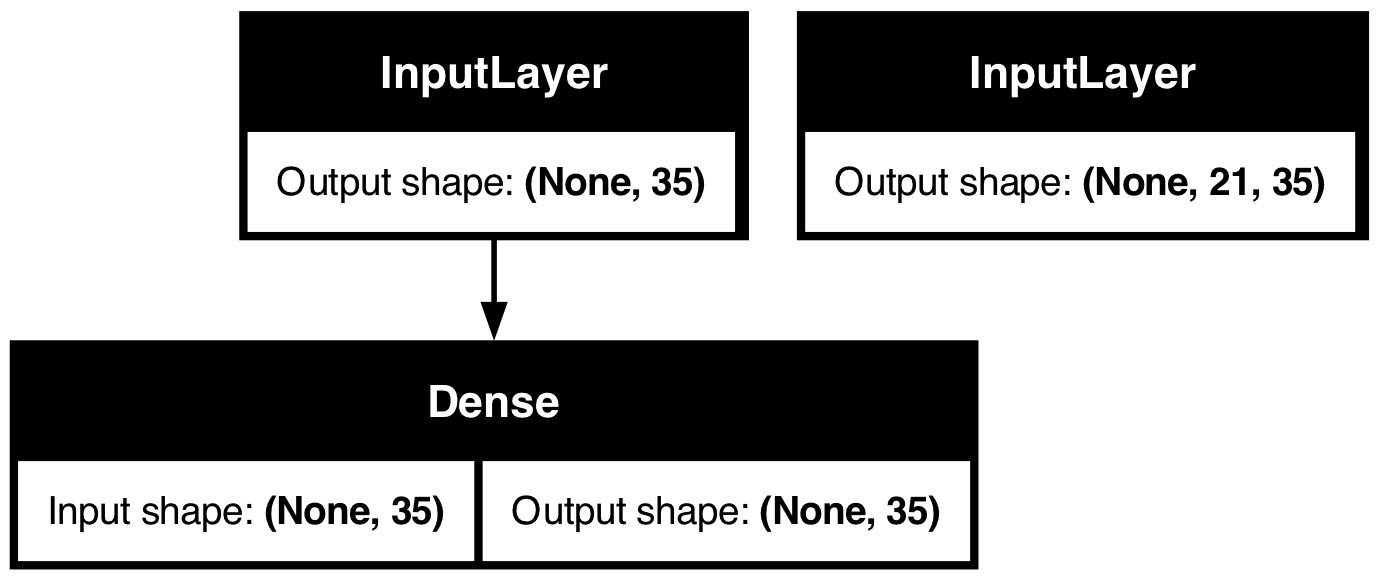

In [1185]:
tf.keras.utils.plot_model(model=model3,
         show_shapes=True, to_file='./enc-dec.png')